In [187]:
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [188]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [189]:
data = pd.read_csv('HousingData.csv')

In [190]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [191]:
data.fillna({'LSTAT':data['LSTAT'].mean()}, inplace=True)


In [192]:
corr = data.corr()

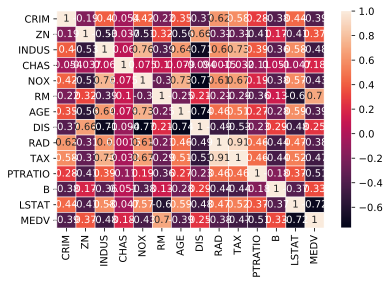

In [193]:
sns.heatmap(corr, annot=True, linewidths=0.5)

In [194]:
X = data[['LSTAT','RM']].to_numpy()
y = data[['MEDV']].to_numpy()
# w = np.array([[2.0,-3.0]])
# X = np.random.rand(500,2)
# e = np.random.rand(500,1)
# y = X@w.T

# print(X.shape, y.shape)
# print(w.shape)
# plt.scatter(X[:,0],y)
# plt.show()


X = torch.from_numpy(X).float().to(device)
y = torch.from_numpy(y).float().to(device)


In [195]:
data_t = TensorDataset(X,y)


In [196]:
batch_size = 20
train      = DataLoader(data_t, batch_size=batch_size, shuffle=True)


In [197]:
model = nn.Linear(2,1).to(device)

In [210]:
lr = 0.001
epochs = 1000
model = nn.Linear(2,1).to(device)
criterion = F.mse_loss
optimizer = torch.optim.SGD(model.parameters(),lr=lr)


In [211]:
for i in range(1,epochs+1):
    
    for a,b in train:
        y_pred = model(a)
        loss = criterion(y_pred,b)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if i%50==0:
        print(f'Loss for {i} epoch is: {loss}')

Loss for 50 epoch is: 39.30940246582031
Loss for 100 epoch is: 65.71711730957031
Loss for 150 epoch is: 73.07588195800781
Loss for 200 epoch is: 49.213741302490234
Loss for 250 epoch is: 44.752803802490234
Loss for 300 epoch is: 29.916339874267578
Loss for 350 epoch is: 13.046846389770508
Loss for 400 epoch is: 56.6538200378418
Loss for 450 epoch is: 85.15556335449219
Loss for 500 epoch is: 56.7347412109375
Loss for 550 epoch is: 27.29665756225586
Loss for 600 epoch is: 6.3915910720825195
Loss for 650 epoch is: 5.606784820556641
Loss for 700 epoch is: 18.266569137573242
Loss for 750 epoch is: 9.462313652038574
Loss for 800 epoch is: 25.154632568359375
Loss for 850 epoch is: 61.783233642578125
Loss for 900 epoch is: 17.427413940429688
Loss for 950 epoch is: 34.291961669921875
Loss for 1000 epoch is: 15.500534057617188


In [110]:
prueba = model(X)

In [111]:
prueba

tensor([[ 5.9273],
        [ 8.4663],
        [ 5.5703],
        [ 4.8169],
        [10.9813],
        [ 6.0147],
        [10.3630],
        [14.6230],
        [21.1475],
        [13.2773],
        [15.5146],
        [10.8866],
        [12.3643],
        [ 7.7336],
        [ 9.0400],
        [ 7.8202],
        [ 6.6787],
        [11.7538],
        [ 9.6852],
        [ 9.5342],
        [15.5578],
        [11.2194],
        [14.3427],
        [14.9399],
        [12.7465],
        [12.7517],
        [11.7727],
        [13.4064],
        [10.7814],
        [10.3385],
        [16.6003],
        [10.7673],
        [19.8843],
        [13.9407],
        [15.3369],
        [10.5107],
        [ 9.6595],
        [ 8.0138],
        [ 8.9084],
        [ 5.5227],
        [ 4.2272],
        [ 5.9154],
        [ 6.2884],
        [ 7.3229],
        [ 8.5860],
        [ 8.8483],
        [11.3499],
        [14.3493],
        [21.6073],
        [12.5592],
        [10.9812],
        [ 8.5289],
        [ 6.